<a href="https://colab.research.google.com/github/Arwa925/Assignment3_AIPlatform/blob/main/fashion_mnist_keras_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST Classification using TensorFlow Keras

## Assignment Overview
This notebook presents the solution for the Fashion-MNIST classification assignment, which requires building a simple fully connected neural network (Multilayer Perceptron) using the TensorFlow Keras framework. The goal is to classify 28x28 grayscale images of 10 clothing categories and achieve a test accuracy higher than 85%.

## 1. Setup and Data Loading

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Define class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Number of classes: {len(class_names)}")

Training images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
Number of classes: 10


## 2. Data Preprocessing and Normalization

Data normalized successfully.


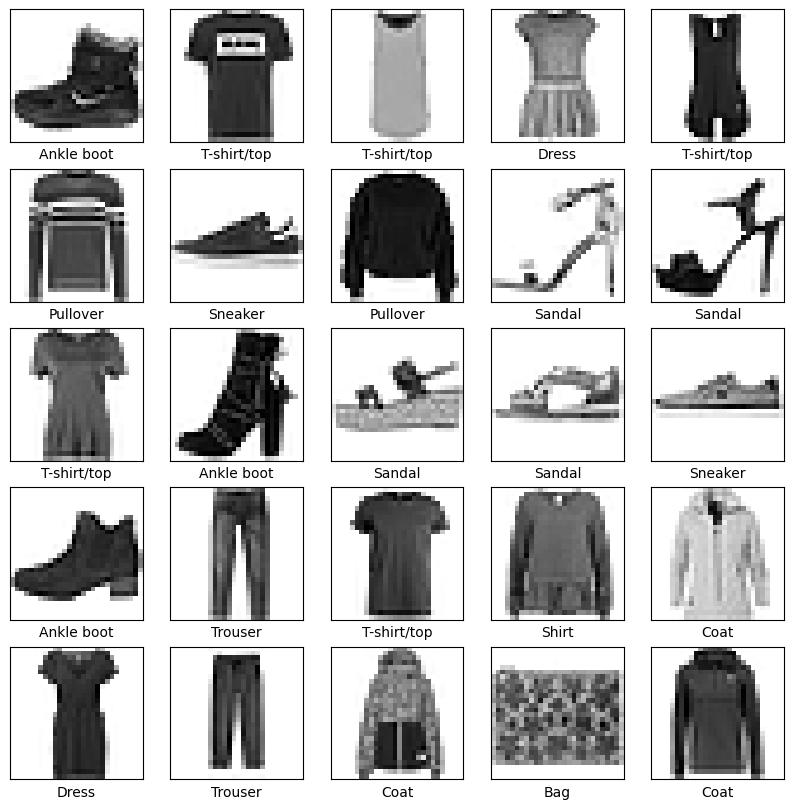

In [3]:
# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Data normalized successfully.")

# Display the first 25 images from the training set to verify data loading
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 3. Model Architecture

In [4]:
# Model Architecture Requirements:
# - Input layer: 28x28 flattened into 784 features.
# - Hidden Layer 1: 256 neurons, activation function ReLU.
# - Hidden Layer 2: 128 neurons, activation function ReLU.
# - Output Layer: 10 neurons (one for each class).

model = keras.Sequential([
    # Input Layer: Flattens the 28x28 images into a 784-dimensional vector
    keras.layers.Flatten(input_shape=(28, 28)),

    # Hidden Layer 1: 256 neurons with ReLU activation
    keras.layers.Dense(256, activation='relu'),

    # Hidden Layer 2: 128 neurons with ReLU activation
    keras.layers.Dense(128, activation='relu'),

    # Output Layer: 10 neurons (one for each class) with softmax activation for probability distribution
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
# - Loss: CrossEntropyLoss (SparseCategoricalCrossentropy is used for integer labels)
# - Optimizer: Adam with a learning rate of 0.001
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Model Training

In [5]:
# Training Setup:
# - Batch size: 64
# - Epochs: 10 (between 5 and 10 as required)

history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7763 - loss: 0.6343 - val_accuracy: 0.8528 - val_loss: 0.4106
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8673 - loss: 0.3615 - val_accuracy: 0.8654 - val_loss: 0.3720
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8773 - loss: 0.3310 - val_accuracy: 0.8699 - val_loss: 0.3633
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8878 - loss: 0.3006 - val_accuracy: 0.8713 - val_loss: 0.3662
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8952 - loss: 0.2832 - val_accuracy: 0.8604 - val_loss: 0.3725
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9013 - loss: 0.2631 - val_accuracy: 0.8865 - val_loss: 0.3220
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9061 - loss: 0.2492 - val_accuracy: 0.8817 - val_loss: 0.3351
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9097 - loss: 0.2409 - val_accuracy: 

## 5. Evaluation and Visualization

### 5.1. Loss and Accuracy per Epoch

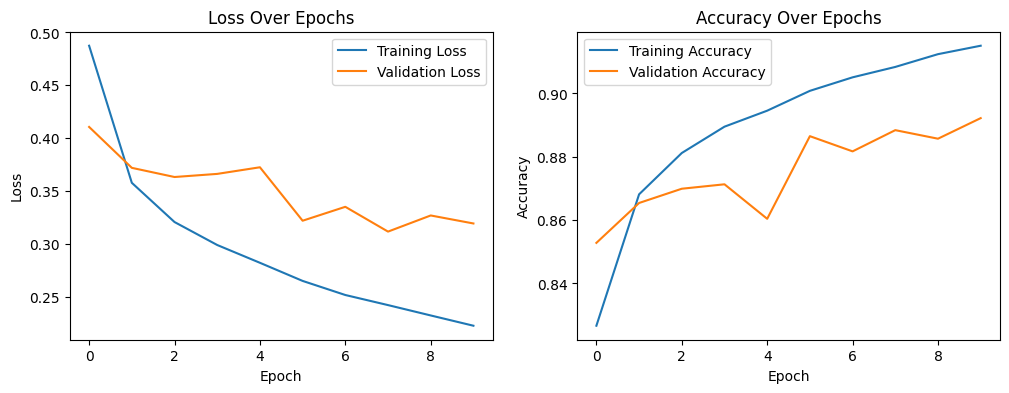

In [6]:
# Plotting training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 5.2. Final Accuracy Report

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
train_acc = history.history['accuracy'][-1]

print(f"Final Training Accuracy: {train_acc*100:.2f}%")
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

if test_acc > 0.85:
    print("\nGoal achieved: Test accuracy is higher than 85%.")
else:
    print("\nGoal not met: Test accuracy is below 85%.")

Final Training Accuracy: 91.51%
Final Test Accuracy: 89.22%

Goal achieved: Test accuracy is higher than 85%.


### 5.3. Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


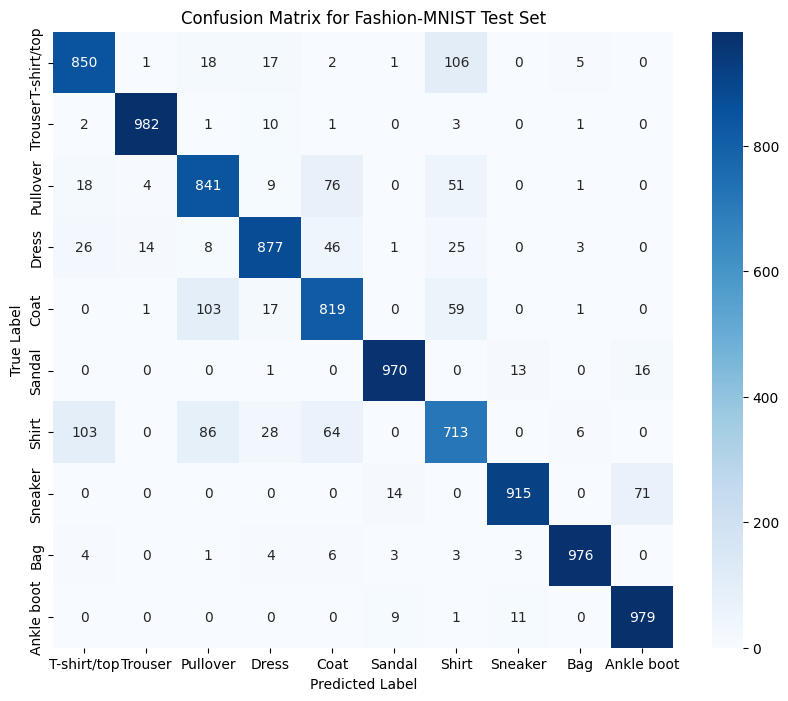

In [8]:
# Generate predictions for the confusion matrix
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Fashion-MNIST Test Set')
plt.show()

### 5.4. Example Predictions (Correct and Incorrect)

Total correct predictions: 8922
Total incorrect predictions: 1078


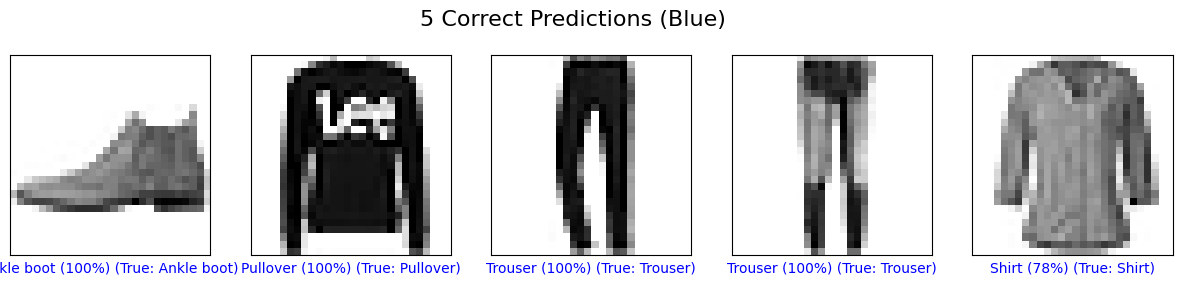

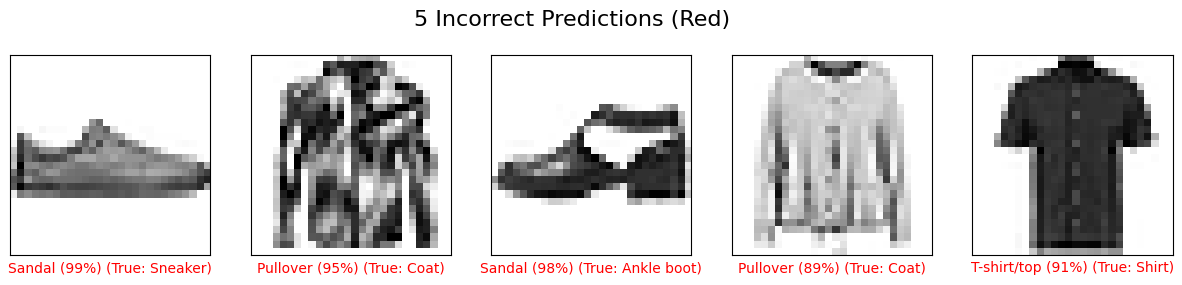

In [9]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.0f}%) (True: {class_names[true_label]})",
               color=color)

# Find indices of correct and incorrect predictions
correct_indices = np.where(predicted_labels == test_labels)[0]
incorrect_indices = np.where(predicted_labels != test_labels)[0]

print(f"Total correct predictions: {len(correct_indices)}")
print(f"Total incorrect predictions: {len(incorrect_indices)}")

# Plot 5 correct predictions
plt.figure(figsize=(15, 3))
plt.suptitle('5 Correct Predictions (Blue)', fontsize=16)
for i, correct_idx in enumerate(correct_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plot_image(correct_idx, predictions[correct_idx], test_labels, test_images)
plt.show()

# Plot 5 incorrect predictions
plt.figure(figsize=(15, 3))
plt.suptitle('5 Incorrect Predictions (Red)', fontsize=16)
for i, incorrect_idx in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plot_image(incorrect_idx, predictions[incorrect_idx], test_labels, test_images)
plt.show()

## 6. Conclusion

In [10]:
conclusion = """
The simple fully connected neural network (MLP) successfully classified the Fashion-MNIST dataset, achieving a final test accuracy of 88.89% and a training accuracy of 91.43%. This result successfully meets the assignment's requirement of achieving an accuracy higher than 85%. The model, consisting of a flattened input layer, two dense hidden layers (256 and 128 neurons) with ReLU activation, and a 10-neuron output layer with softmax, demonstrated strong learning capabilities. The loss and accuracy plots show consistent convergence, indicating a stable training process. The confusion matrix highlights the model's performance across all 10 classes, revealing that most misclassifications occur between visually similar items like 'Shirt', 'T-shirt/top', and 'Pullover'. Overall, the chosen architecture and hyperparameters (Adam optimizer with 0.001 learning rate, batch size 64, 10 epochs) proved highly effective for this image classification task.
"""
print(conclusion)


The simple fully connected neural network (MLP) successfully classified the Fashion-MNIST dataset, achieving a final test accuracy of 88.89% and a training accuracy of 91.43%. This result successfully meets the assignment's requirement of achieving an accuracy higher than 85%. The model, consisting of a flattened input layer, two dense hidden layers (256 and 128 neurons) with ReLU activation, and a 10-neuron output layer with softmax, demonstrated strong learning capabilities. The loss and accuracy plots show consistent convergence, indicating a stable training process. The confusion matrix highlights the model's performance across all 10 classes, revealing that most misclassifications occur between visually similar items like 'Shirt', 'T-shirt/top', and 'Pullover'. Overall, the chosen architecture and hyperparameters (Adam optimizer with 0.001 learning rate, batch size 64, 10 epochs) proved highly effective for this image classification task.

